# Data Analysis
The data analysis is crucial for the understanding of the raw counter/KPI dataset. It includes some data pre-processing (removing invalid entries, missing data handling, etc.) as well as analysis on the counter/KPIs statistics.

## 01 Load CSV Data

### Import Lib

In [1]:
import numpy as np
import pandas as pd
import scipy
from pandas import DataFrame
from pandas import read_csv
import matplotlib.pyplot as plt

### Read csv

In [2]:
import glob

In [3]:
# load KPIs files from a folder
files = glob.glob('data/changzhou1220/common_files*.csv')
print (files)

['data/changzhou1220\\common_files_HighLoadAnalysis201812200038255c1a038136d32.csv']


In [4]:
dfs = [pd.read_csv(fp,encoding = 'gbk') for fp in files]
df_raw = pd.concat(dfs, ignore_index=True)

In [5]:
# df_raw = pd.read_csv('data\cellload_0719.csv',encoding = 'gbk')

In [6]:
df_raw.head()

,day,hour,cellNum,subNet,cluster,site,siteType,sitenamechinese,location,cellNameChinese,...,RLC时延,LTE_User_THP_DL_kpbs,LTE_User_THP_UL_kpbs,CellTputDl_kbps,Uplink Cell Throughput(kbps),MAC层下行BLER,MAC层上行BLER,RLC层下行重传率(%),RLC层上行重传率(%),SRfail占SR的比例
0,12/18/2018,0,1,CZ_Changzhou_g1tdd1,网格21,LD31C01,Erbs,方基LD,LD31C01A,方基LD129,...,3.04,39307.00,2166.66,10600.53,313.06,8.34,2.58,0.08,0.00,0.0
1,12/18/2018,0,1,CZ_Changzhou_g1tdd1,网格21,LD31C01,Erbs,方基LD,LD31C01B,方基LD130,...,3.43,47408.64,1822.22,4951.13,648.95,6.38,5.18,0.39,0.08,0.0
2,12/18/2018,0,1,CZ_Changzhou_g1tdd1,网格21,LD31C01,Erbs,方基LD,LD31C01C,方基LD131,...,27.83,34727.37,1331.36,18777.70,550.92,9.90,3.46,0.36,0.02,0.0
3,12/18/2018,0,1,CZ_Changzhou_g1tdd1,网格15,LD31I40,Erbs,邹区2LD,LD31I40A,邹区2LD129,...,27.07,24228.84,1030.28,11118.59,673.89,12.17,11.07,0.44,0.06,0.0
4,12/18/2018,0,1,CZ_Changzhou_g1tdd1,网格15,LD31I40,Erbs,邹区2LD,LD31I40B,邹区2LD130,...,26.53,53875.94,1777.93,19964.56,881.02,8.69,7.94,0.06,0.14,0.0


In [7]:
df_raw.columns

Index(['day', 'hour', 'cellNum', 'subNet', 'cluster', 'site', 'siteType',
       'sitenamechinese', 'location', 'cellNameChinese', '覆盖属性', 'ecgi',
       'Users_RRC_Avg', 'DL_PDSCH_Usage', 'PDCCH_CCE_利用率超过70%的比例',
       'DL_Volume_GB', 'UL_PUSCH_Usage', 'UL_Volume_GB', 'RLC时延',
       'LTE_User_THP_DL_kpbs', 'LTE_User_THP_UL_kpbs', 'CellTputDl_kbps',
       'Uplink Cell Throughput(kbps)', 'MAC层下行BLER', 'MAC层上行BLER',
       'RLC层下行重传率(%)', 'RLC层上行重传率(%)', 'SRfail占SR的比例'],
      dtype='object')

In [8]:
df_clean =  df_raw[['day', 'hour', 'location','Users_RRC_Avg', 'DL_PDSCH_Usage', 'PDCCH_CCE_利用率超过70%的比例',
       'DL_Volume_GB', 'UL_PUSCH_Usage', 'UL_Volume_GB', 'RLC时延',
       'LTE_User_THP_DL_kpbs', 'LTE_User_THP_UL_kpbs', 'CellTputDl_kbps',
       'Uplink Cell Throughput(kbps)', 'MAC层下行BLER', 'MAC层上行BLER',
       'RLC层下行重传率(%)', 'RLC层上行重传率(%)', 'SRfail占SR的比例']]

In [9]:
df_clean.head()

,day,hour,location,Users_RRC_Avg,DL_PDSCH_Usage,PDCCH_CCE_利用率超过70%的比例,DL_Volume_GB,UL_PUSCH_Usage,UL_Volume_GB,RLC时延,LTE_User_THP_DL_kpbs,LTE_User_THP_UL_kpbs,CellTputDl_kbps,Uplink Cell Throughput(kbps),MAC层下行BLER,MAC层上行BLER,RLC层下行重传率(%),RLC层上行重传率(%),SRfail占SR的比例
0,12/18/2018,0,LD31C01A,5.87,5.67,0.0,0.42,0.82,0.02,3.04,39307.00,2166.66,10600.53,313.06,8.34,2.58,0.08,0.00,0.0
1,12/18/2018,0,LD31C01B,4.29,1.57,0.0,0.01,0.15,0.00,3.43,47408.64,1822.22,4951.13,648.95,6.38,5.18,0.39,0.08,0.0
2,12/18/2018,0,LD31C01C,6.54,4.31,0.0,0.41,0.50,0.01,27.83,34727.37,1331.36,18777.70,550.92,9.90,3.46,0.36,0.02,0.0
3,12/18/2018,0,LD31I40A,4.12,2.69,0.0,0.11,0.35,0.00,27.07,24228.84,1030.28,11118.59,673.89,12.17,11.07,0.44,0.06,0.0
4,12/18/2018,0,LD31I40B,7.13,4.92,0.0,0.60,1.55,0.03,26.53,53875.94,1777.93,19964.56,881.02,8.69,7.94,0.06,0.14,0.0


In [10]:
df_clean.columns

Index(['day', 'hour', 'location', 'Users_RRC_Avg', 'DL_PDSCH_Usage',
       'PDCCH_CCE_利用率超过70%的比例', 'DL_Volume_GB', 'UL_PUSCH_Usage',
       'UL_Volume_GB', 'RLC时延', 'LTE_User_THP_DL_kpbs', 'LTE_User_THP_UL_kpbs',
       'CellTputDl_kbps', 'Uplink Cell Throughput(kbps)', 'MAC层下行BLER',
       'MAC层上行BLER', 'RLC层下行重传率(%)', 'RLC层上行重传率(%)', 'SRfail占SR的比例'],
      dtype='object')

In [11]:
# get highload cell data
# dftemp = pd.read_csv('highloadcell.csv',encoding = 'gbk')
# df_result = df_clean.join(dftemp.set_index('location'),on='location',how='inner')
# df_result.columns = ['day','hour','cell','Users_RRC_Max','Users_RRC_Avg','DL_PDSCH_Usage','DL_PDCCH_Usage','DL_Volume','UL_PUSCH_Usage','UL_Volume','Time_Delay']
# df_result.head(50)
# df_result.to_csv('result.csv')

In [12]:
# df_clean.to_csv('data/changzhou1101/data_raw.csv')

In [13]:
# df_clean_show[df_clean_show['location'] == 'LD31E42B'].sort_values(by=['day', 'hour'])

In [14]:
df_clean.columns = ['day','hour','cell', 'Users_RRC_Avg', 'PDSCH_Usage_DL',
       'PDCCH_CCE_Above_70', 'DL_Volume_GB', 'PUSCH_Usage_UL', 'UL_Volume_GB',
       'RLC_Time_Delay', 'User_THP_DL_kbps', 'User_THP_UL_kbps',
       'Cell_THP_Dl_kbps', 'Cell_THP_UL_kbps',
       'MAC_Retransmission_DL', 'MAC_Retransmission_UL', 'RLC_Retransmission_DL', 'RLC_Retransmission_UL','SRfail_RAatt']

In [15]:
df_clean.head()

,day,hour,cell,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
0,12/18/2018,0,LD31C01A,5.87,5.67,0.0,0.42,0.82,0.02,3.04,39307.00,2166.66,10600.53,313.06,8.34,2.58,0.08,0.00,0.0
1,12/18/2018,0,LD31C01B,4.29,1.57,0.0,0.01,0.15,0.00,3.43,47408.64,1822.22,4951.13,648.95,6.38,5.18,0.39,0.08,0.0
2,12/18/2018,0,LD31C01C,6.54,4.31,0.0,0.41,0.50,0.01,27.83,34727.37,1331.36,18777.70,550.92,9.90,3.46,0.36,0.02,0.0
3,12/18/2018,0,LD31I40A,4.12,2.69,0.0,0.11,0.35,0.00,27.07,24228.84,1030.28,11118.59,673.89,12.17,11.07,0.44,0.06,0.0
4,12/18/2018,0,LD31I40B,7.13,4.92,0.0,0.60,1.55,0.03,26.53,53875.94,1777.93,19964.56,881.02,8.69,7.94,0.06,0.14,0.0


In [16]:
df_clean.shape

(622669, 19)

In [17]:
df_clean.dropna(inplace = True)

c:\users\esvxyah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_clean.shape

(585214, 19)

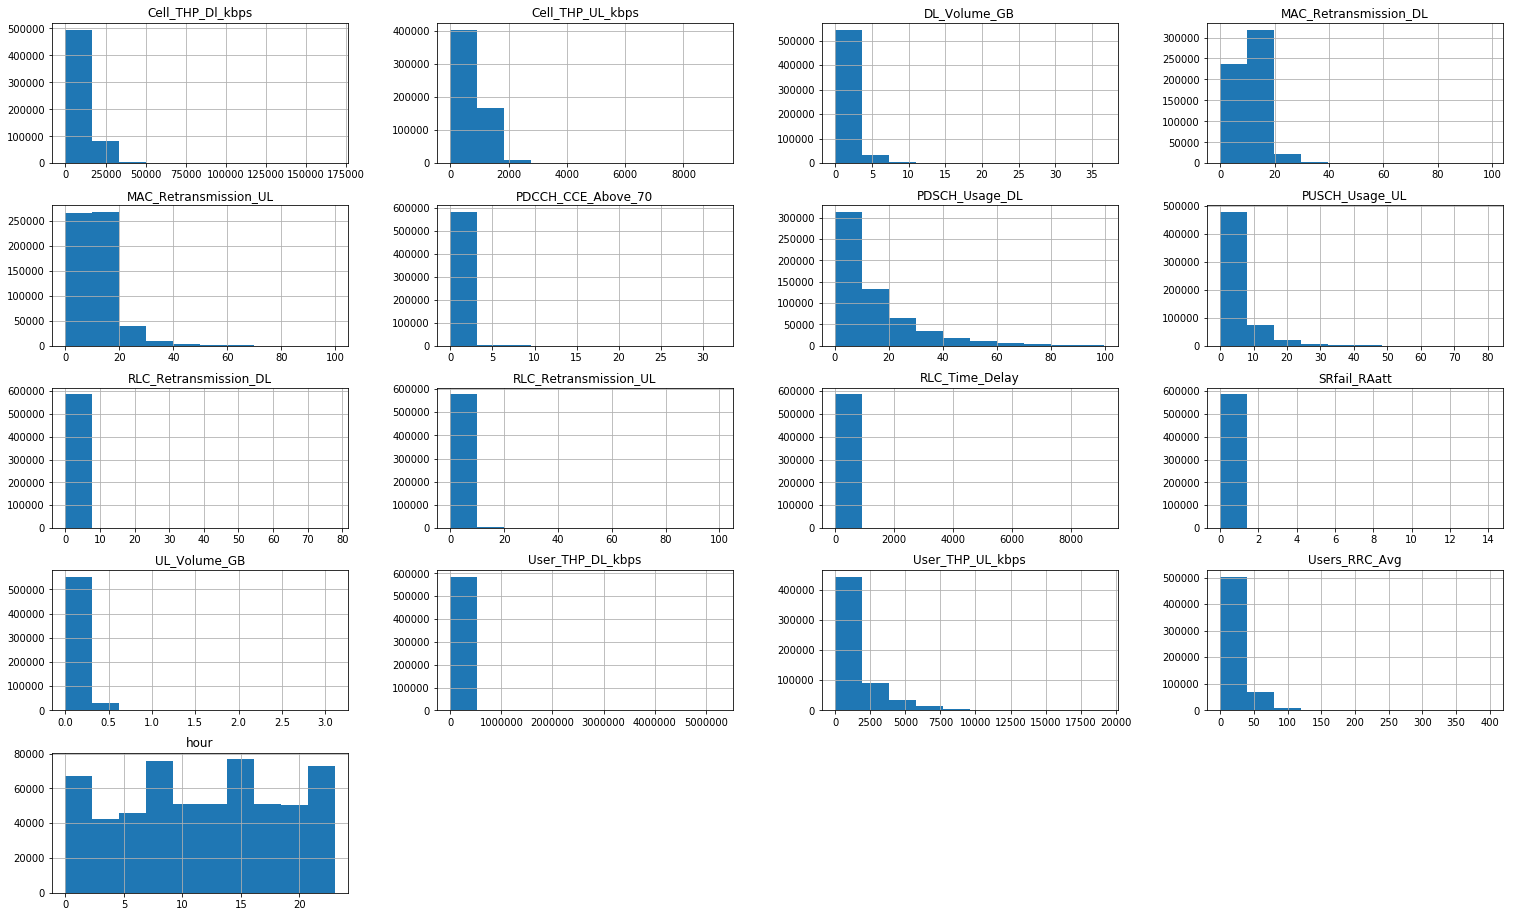

In [19]:
df_clean.hist(figsize=(26, 16))
plt.show()

In [20]:
df_clean.describe()

,hour,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
count,585214.000000,585214.000000,585214.000000,585214.000000,585214.000000,585214.000000,585214.000000,585214.000000,5.852140e+05,585214.000000,585214.000000,585214.000000,585214.000000,585214.00000,585214.000000,585214.000000,585214.000000
mean,11.774373,20.486115,14.385964,0.096330,1.205379,4.700204,0.090877,31.022759,2.604965e+04,1438.559321,10944.672423,808.246789,11.217585,11.82698,0.308196,0.917332,0.006699
std,6.805939,20.931190,14.894540,0.755634,1.526385,6.285131,0.123926,32.657402,2.104202e+04,1599.321987,6867.853070,424.524632,5.359046,7.18426,0.664840,3.128582,0.067569
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.090000,0.000000e+00,0.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,3.970000,0.000000,0.180000,0.720000,0.010000,13.660000,1.426995e+04,375.530000,6395.700000,524.810000,8.340000,7.55000,0.070000,0.060000,0.000000
50%,12.000000,13.970000,9.060000,0.000000,0.680000,2.370000,0.050000,25.080000,2.189413e+04,828.625000,9720.855000,730.200000,10.660000,10.50000,0.170000,0.170000,0.000000
75%,18.000000,28.010000,19.320000,0.000000,1.660000,6.170000,0.120000,40.520000,3.422383e+04,1875.627500,13935.430000,1000.330000,13.090000,14.18000,0.370000,0.590000,0.000000
max,23.000000,399.330000,99.740000,31.970000,36.680000,80.480000,3.110000,9136.060000,5.269000e+06,19194.990000,167833.160000,9237.650000,98.870000,99.74000,77.770000,100.000000,14.060000


In [21]:
df_clean.shape

(585214, 19)

## 03 Normalization

In [22]:
df_normal = df_clean.copy()

In [23]:
df_normal.shape

(585214, 19)

In [24]:
# modify the num of days according to days of data
day = 1
df_normal = df_normal.groupby(['cell']).filter(lambda group: len(group) == 24 * day)

In [25]:
df_normal.shape

(442440, 19)

In [26]:
df_normal.head()

,day,hour,cell,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
0,12/18/2018,0,LD31C01A,5.87,5.67,0.0,0.42,0.82,0.02,3.04,39307.00,2166.66,10600.53,313.06,8.34,2.58,0.08,0.00,0.0
1,12/18/2018,0,LD31C01B,4.29,1.57,0.0,0.01,0.15,0.00,3.43,47408.64,1822.22,4951.13,648.95,6.38,5.18,0.39,0.08,0.0
2,12/18/2018,0,LD31C01C,6.54,4.31,0.0,0.41,0.50,0.01,27.83,34727.37,1331.36,18777.70,550.92,9.90,3.46,0.36,0.02,0.0
3,12/18/2018,0,LD31I40A,4.12,2.69,0.0,0.11,0.35,0.00,27.07,24228.84,1030.28,11118.59,673.89,12.17,11.07,0.44,0.06,0.0
4,12/18/2018,0,LD31I40B,7.13,4.92,0.0,0.60,1.55,0.03,26.53,53875.94,1777.93,19964.56,881.02,8.69,7.94,0.06,0.14,0.0


In [27]:
df_normal = df_normal.sort_values(by=['cell','day','hour'])

In [28]:
df_normal.describe()

,hour,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
count,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,4.424400e+05,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000
mean,11.500000,23.742999,16.362220,0.124878,1.330321,5.477691,0.103328,33.803569,2.376658e+04,1239.526134,10551.654509,812.891195,11.093051,11.784803,0.269244,1.018964,0.004666
std,6.922194,21.462293,15.636611,0.862839,1.504044,6.642831,0.127991,34.222235,1.634038e+04,1375.417666,5943.806368,402.892232,4.572455,6.458078,0.438264,3.127671,0.044289
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.190000,0.000000e+00,0.260000,8.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,8.860000,5.170000,0.000000,0.290000,1.120000,0.020000,16.680000,1.349721e+04,348.650000,6600.362500,534.630000,8.610000,7.810000,0.070000,0.070000,0.000000
50%,11.500000,17.400000,11.140000,0.000000,0.840000,3.140000,0.060000,28.080000,2.022404e+04,733.330000,9630.710000,740.155000,10.680000,10.710000,0.160000,0.210000,0.000000
75%,17.250000,31.840000,22.150000,0.000000,1.850000,7.280000,0.140000,43.320000,3.059980e+04,1578.772500,13337.610000,1008.360000,12.860000,14.220000,0.330000,0.730000,0.000000
max,23.000000,399.330000,99.740000,31.970000,26.530000,80.480000,3.110000,9136.060000,4.598111e+06,16243.500000,138973.290000,8323.580000,93.740000,99.740000,41.310000,93.170000,9.810000


In [29]:
print(np.percentile(df_normal['RLC_Time_Delay'],90))

62.781000000000354


In [133]:
kpi_list = ['Users_RRC_Avg', 'PDSCH_Usage_DL',
       'PDCCH_CCE_Above_70', 'DL_Volume_GB', 'PUSCH_Usage_UL', 'UL_Volume_GB',
       'RLC_Time_Delay', 'User_THP_DL_kbps', 'User_THP_UL_kbps',
       'Cell_THP_Dl_kbps', 'Cell_THP_UL_kbps',
       'MAC_Retransmission_DL', 'MAC_Retransmission_UL', 'RLC_Retransmission_DL', 'RLC_Retransmission_UL',
       'SRfail_RAatt']

In [134]:
print(np.percentile(df_normal['Users_RRC_Avg'],90))
print(np.percentile(df_normal['PDSCH_Usage_DL'],90))
print(np.percentile(df_normal['PDCCH_CCE_Above_70'],90))
print(np.percentile(df_normal['DL_Volume_GB'],90))
print(np.percentile(df_normal['PUSCH_Usage_UL'],90))
print(np.percentile(df_normal['UL_Volume_GB'],90))
print(np.percentile(df_normal['RLC_Time_Delay'],90))
print(np.percentile(df_normal['User_THP_DL_kbps'],90))
print(np.percentile(df_normal['User_THP_UL_kbps'],90))
print(np.percentile(df_normal['Cell_THP_Dl_kbps'],90))
print(np.percentile(df_normal['Cell_THP_UL_kbps'],90))
print(np.percentile(df_normal['MAC_Retransmission_DL'],90))
print(np.percentile(df_normal['MAC_Retransmission_UL'],90))
print(np.percentile(df_normal['RLC_Retransmission_DL'],90))
print(np.percentile(df_normal['RLC_Retransmission_UL'],90))
print(np.percentile(df_normal['SRfail_RAatt'],90))

51.22
37.42
0.06
3.22
13.559999999999999
0.26
62.781000000000354
43543.75900000003
3045.793000000001
17832.36
1307.35
15.75
18.83
0.6
2.21
0.01


In [135]:
# kpi_list_90pdf = ['Users_RRC_Avg', 'DL_Volume_GB', 'UL_Volume_GB']

def getmax(x,y):
    if x<y:
        return 0
    else:
        return (x-y)/x
for kpi in kpi_list:
    base = np.percentile(df_normal[kpi],90)
    df_normal[kpi] = df_normal[kpi].apply(lambda x:getmax(x,base))
#     df_normal[kpi] = (df_normal[kpi] - base) / df_normal[kpi]

In [138]:
df_normal.head(5)

,day,hour,cell,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
25943,12/18/2018,0,LA3LK31B,0.0,0.0,0.5,0.0,0.0,0.0,0.100688,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
51892,12/18/2018,1,LA3LK31B,0.0,0.0,0.0,0.0,0.0,0.0,0.046461,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
77841,12/18/2018,2,LA3LK31B,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.047619,0.0,0.0
103790,12/18/2018,3,LA3LK31B,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
119017,12/18/2018,4,LA3LK31B,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.086957,0.195299,0.210526,0.0,0.0


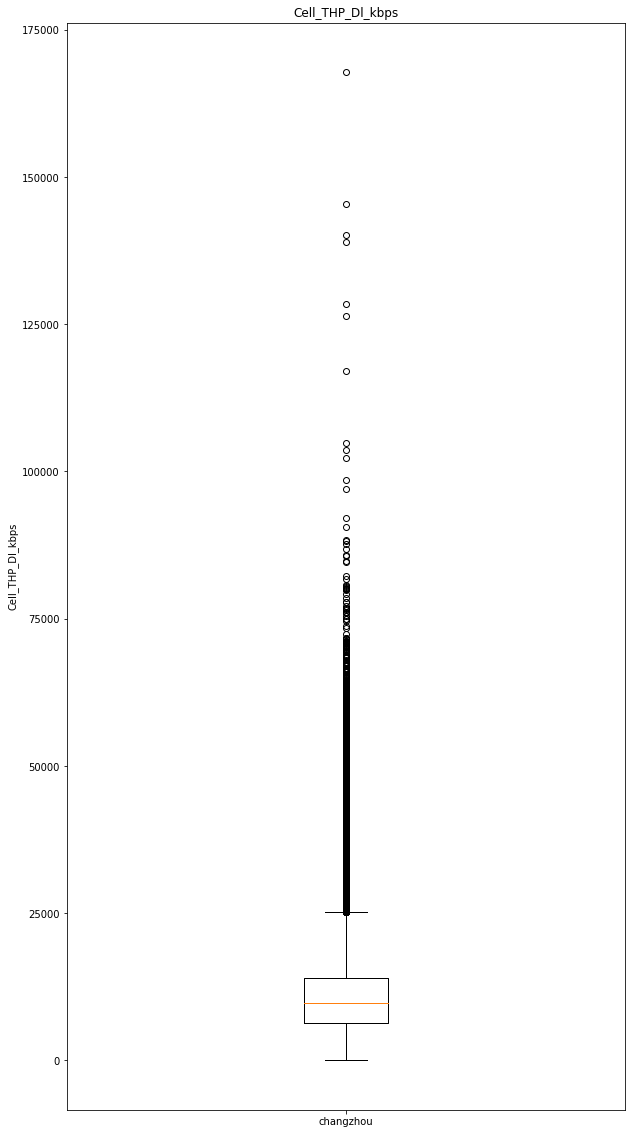

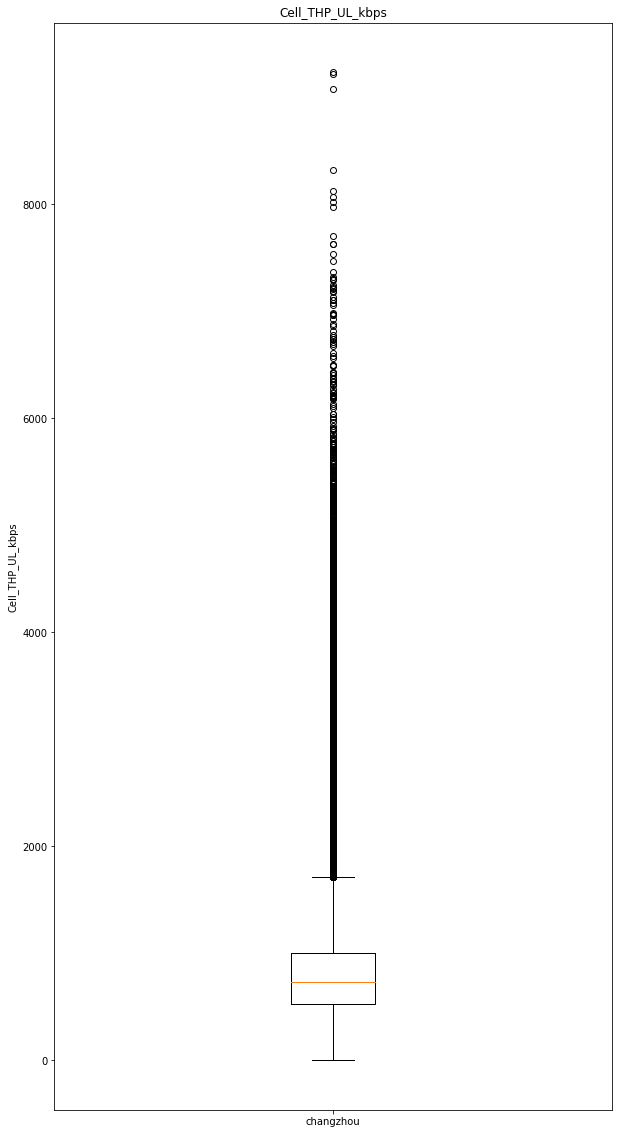

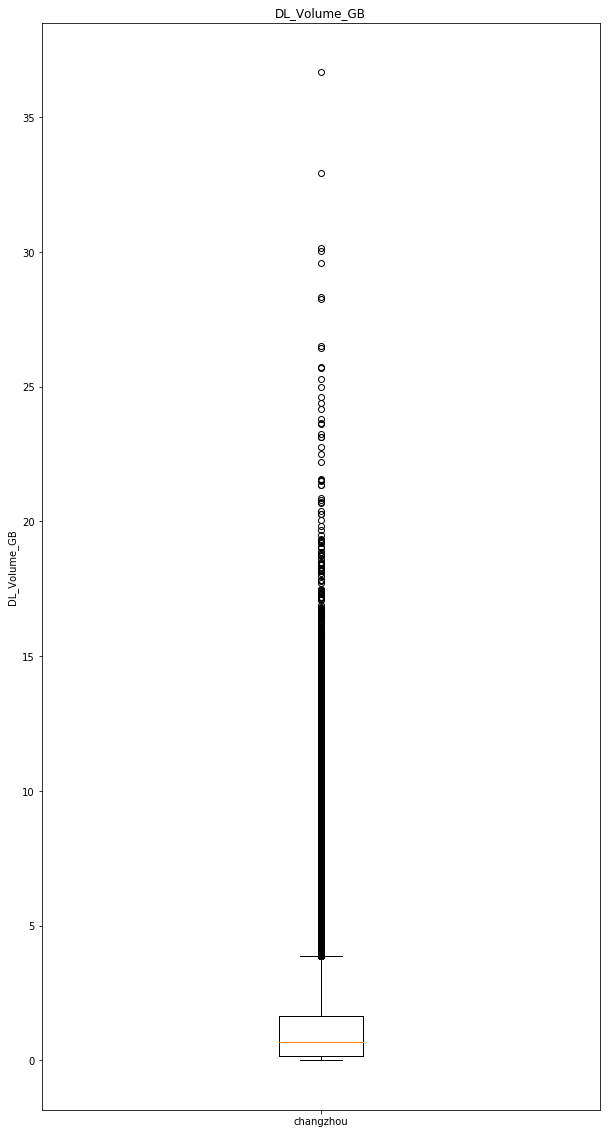

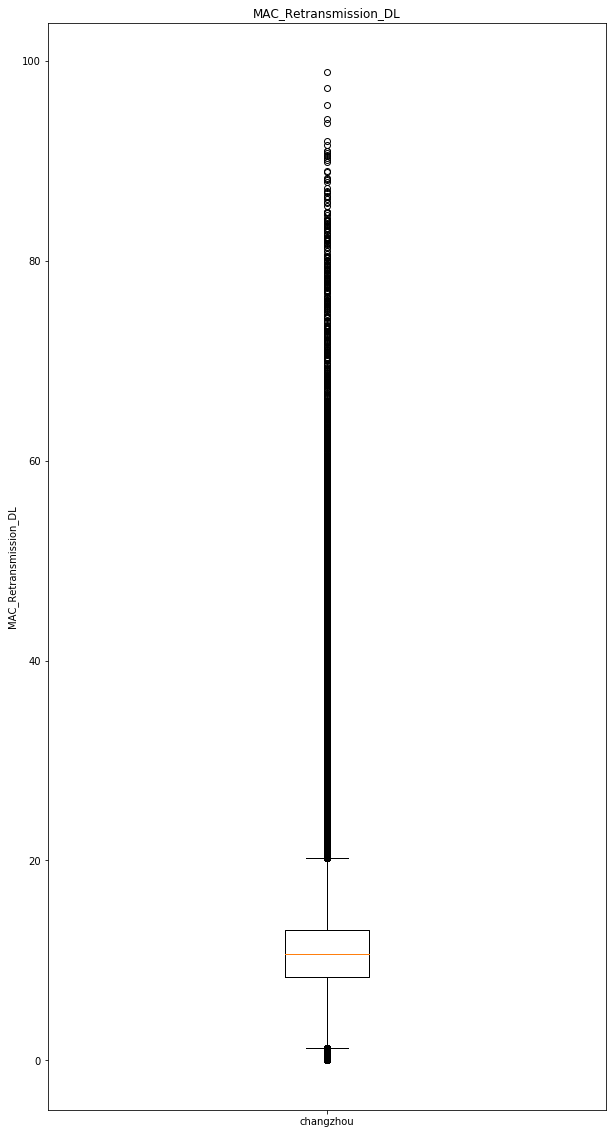

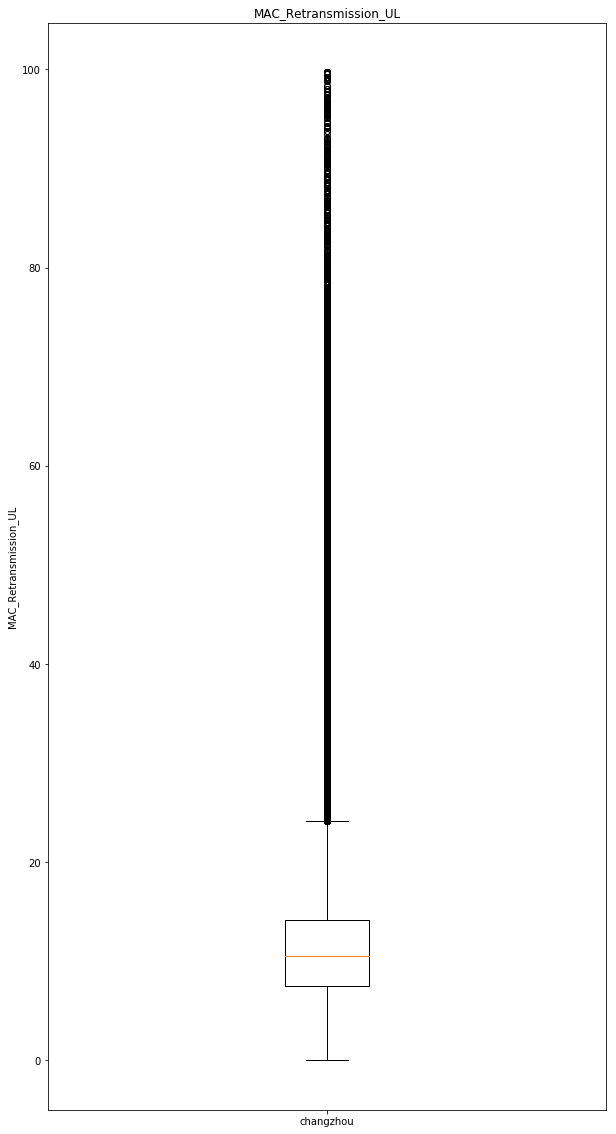

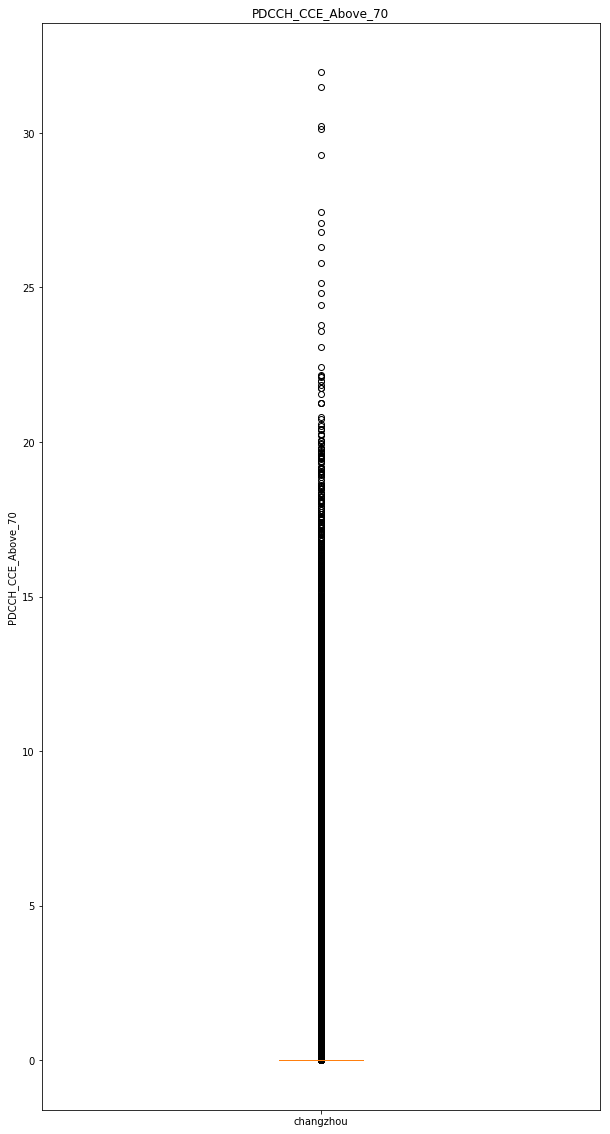

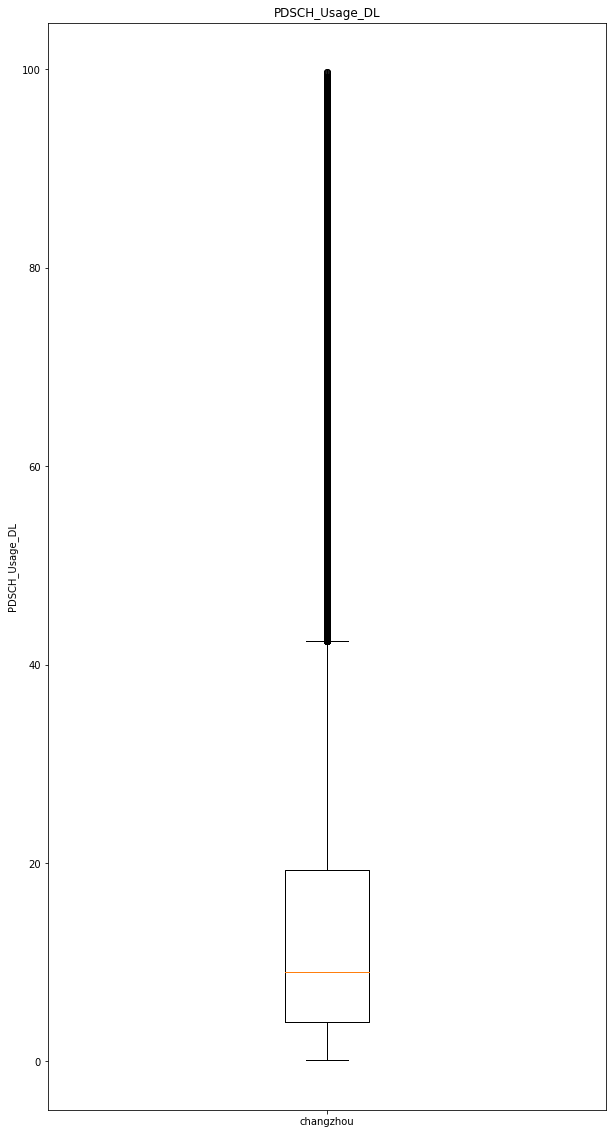

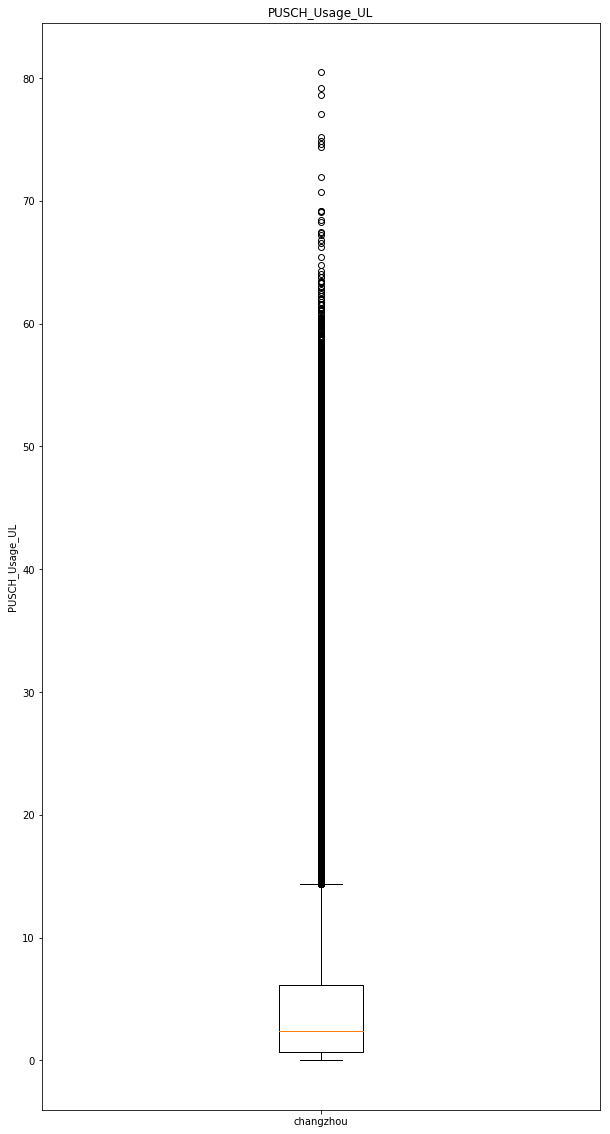

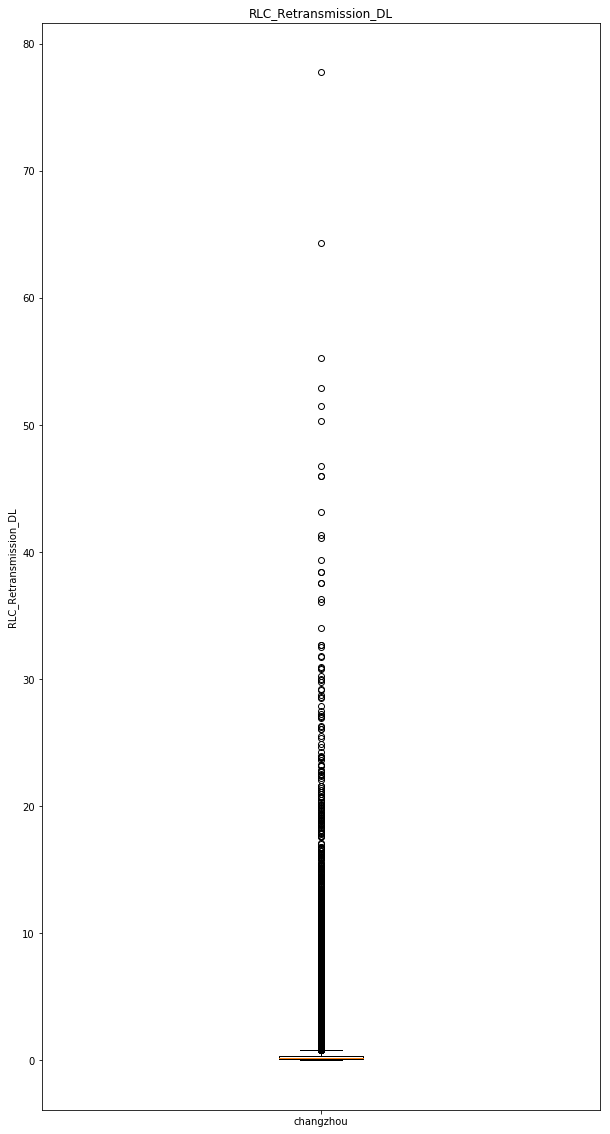

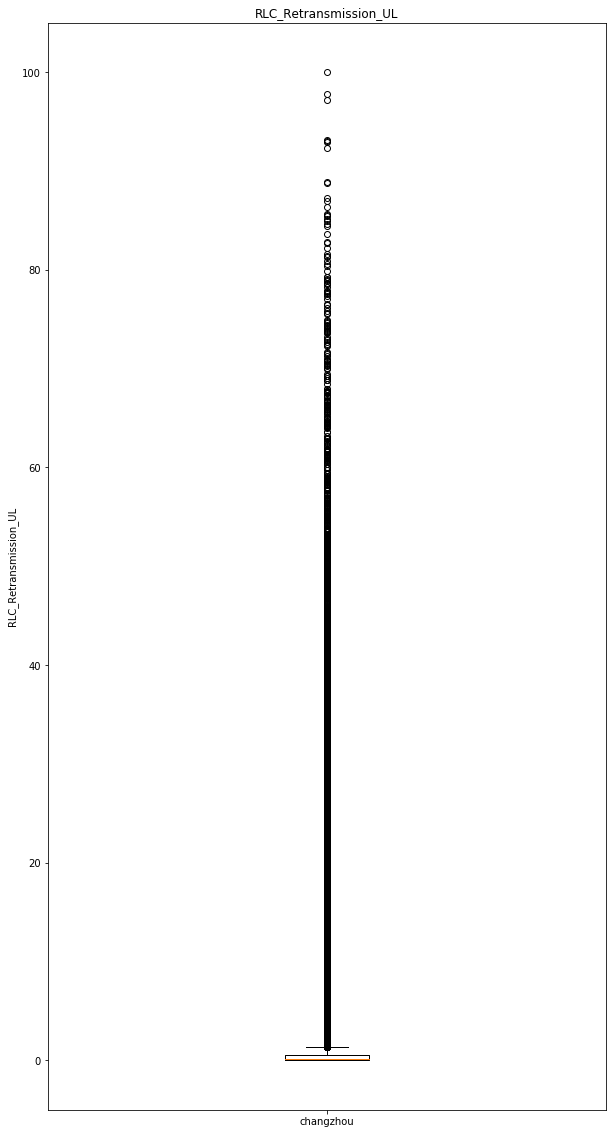

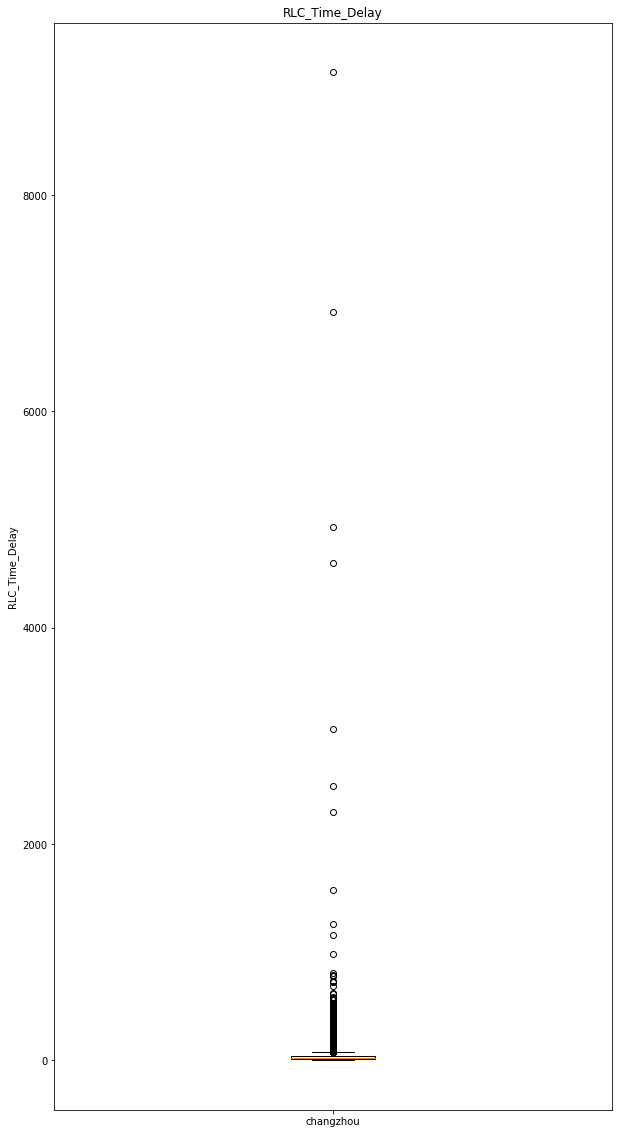

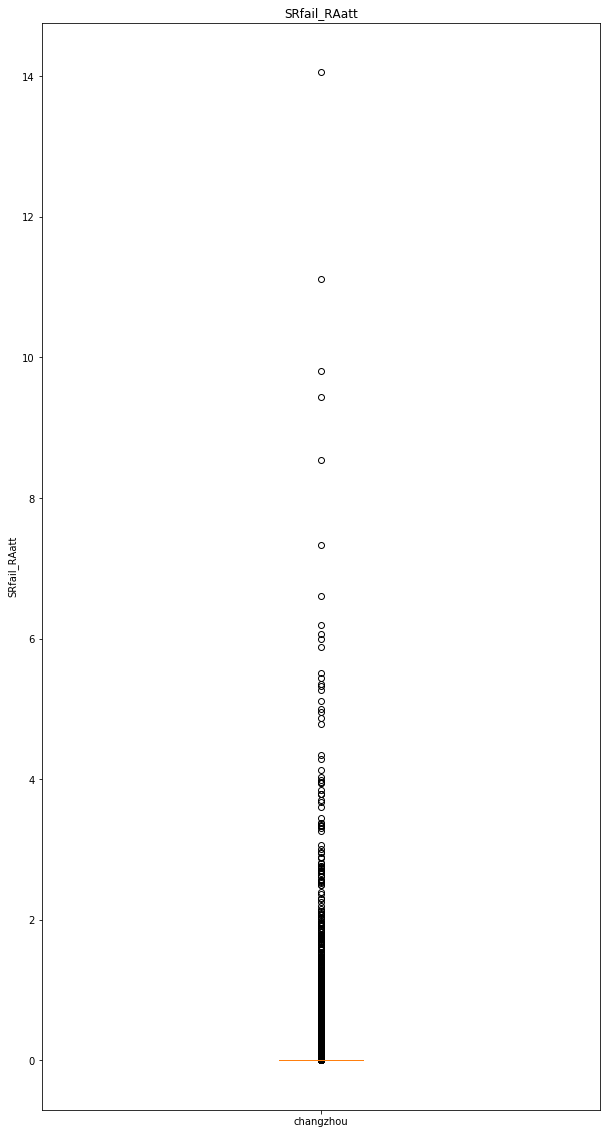

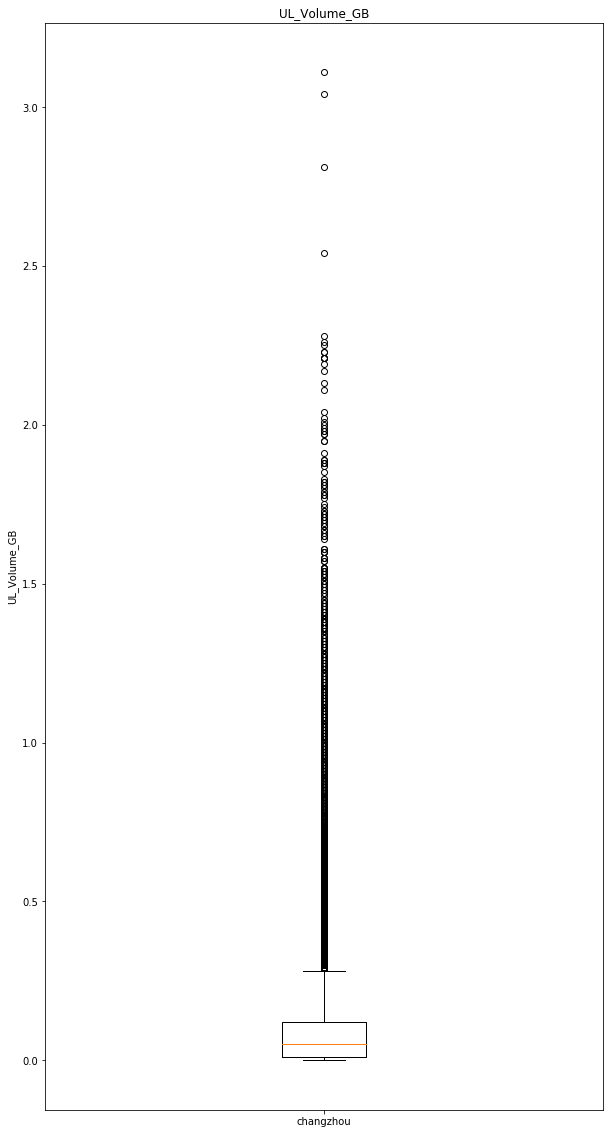

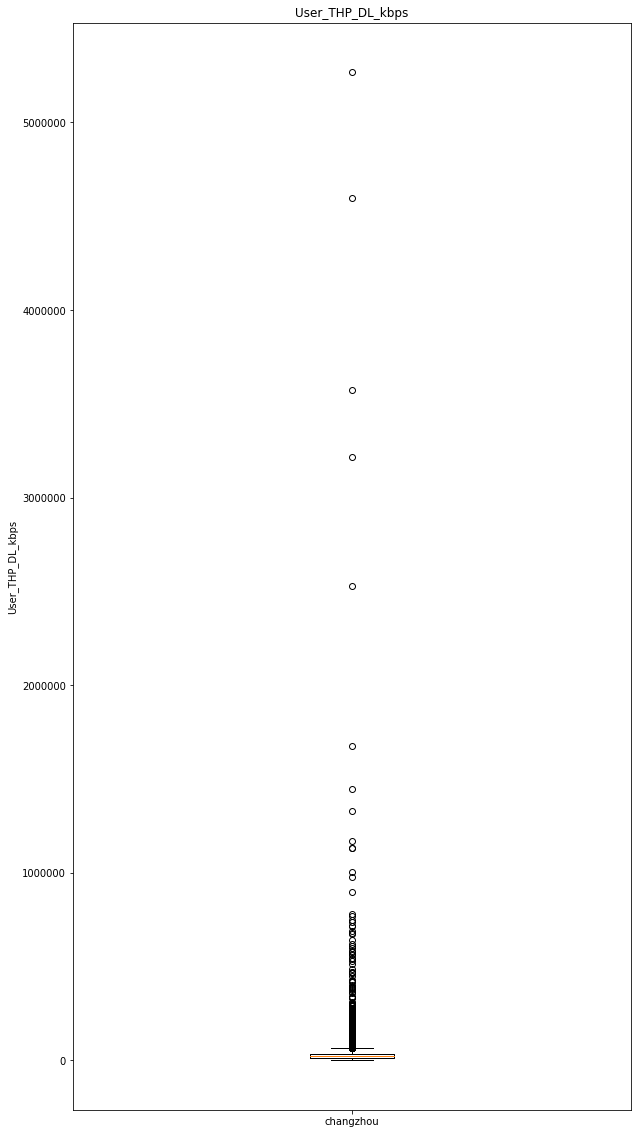

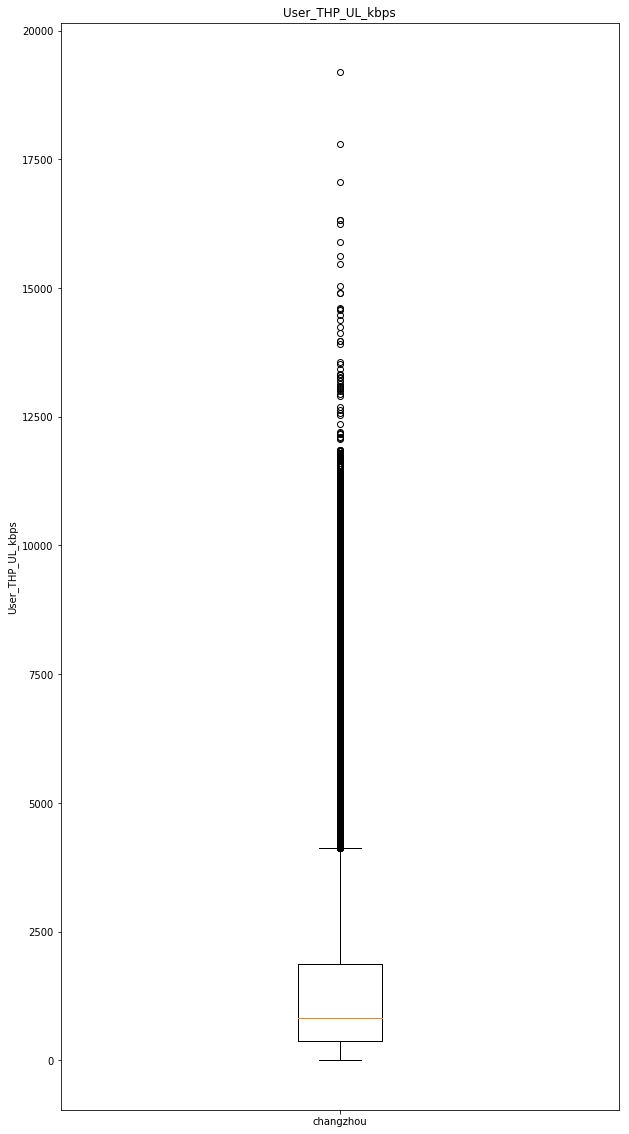

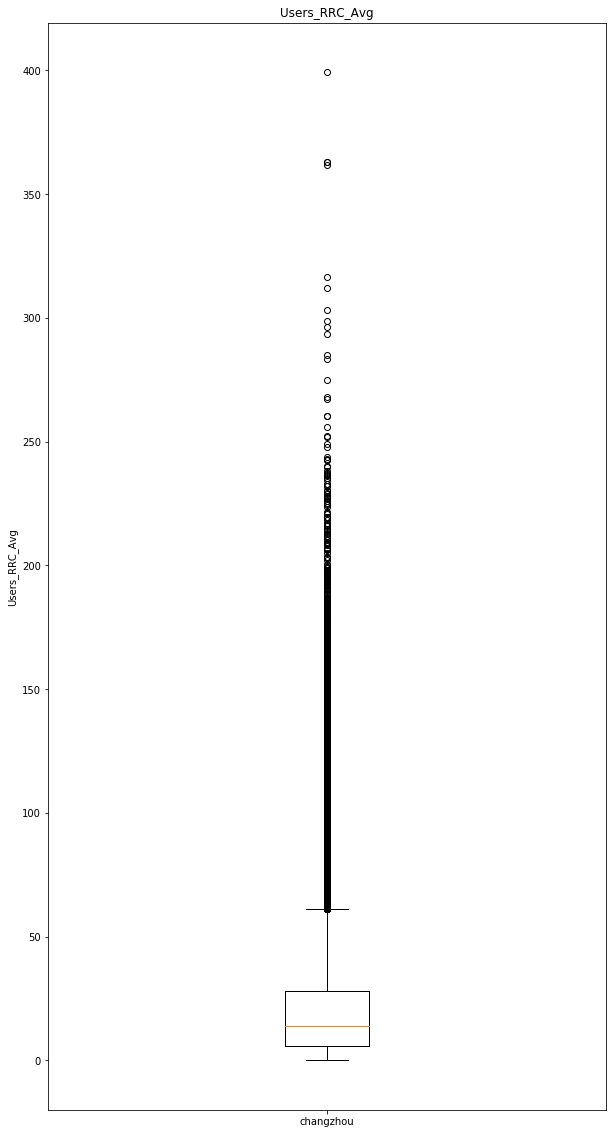

In [137]:
for kpi_name in df_normal.columns.difference(['day','hour', 'cell']):
    # Plot Boxplots
    # Define plot size
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))

    # Plot B1 boxplots
#     ax1.boxplot(df_clean[kpi_name], labels=['changzhou'],whis=[0, 95], showfliers=True)
    ax1.boxplot(df_clean[kpi_name], labels=['changzhou'])
#     ax1.boxplot.stats
    # Define plot characterisitcs
    ax1.set_title(kpi_name)
    ax1.set_ylabel(kpi_name)

    plt.show()
#     fig.savefig('kpi_plot/'+kpi_name+".pdf", bbox_inches='tight')

In [78]:
# import math

# df_normalInd = df_normal[df_normal.columns.difference(['day','hour', 'cell'])]

# #Z-score标准化
# df_normalIndZscore = (df_normalInd-df_normalInd.mean())/df_normalInd.std()
# #df_normalIndZscore.head(5)
# df_normal[df_normal.columns.difference(['day','hour', 'cell'])] = df_normalIndZscore
# df_normal.head(5)


,day,hour,cell,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
25943,12/18/2018,0,LA3LK31B,-0.264324,1.275070,-0.005653,0.538335,0.486586,-0.026005,1.052136,-0.715125,-0.586335,0.003120,-0.247290,-0.210620,0.155650,0.252716,-0.213886,-0.10536
51892,12/18/2018,1,LA3LK31B,-0.444174,-0.076885,-0.144729,-0.239568,-0.366966,-0.494786,0.936129,-0.302454,-0.493447,-0.048991,-0.695797,-0.438069,0.109196,-0.066727,-0.249056,-0.10536
77841,12/18/2018,2,LA3LK31B,-0.529906,-0.632632,-0.144729,-0.698331,-0.657504,-0.729177,0.265512,-0.141143,-0.642697,-0.657918,-1.078976,-0.234677,0.739415,0.823149,-0.265042,-0.10536
103790,12/18/2018,3,LA3LK31B,-0.596069,-0.795071,-0.144729,-0.831306,-0.725247,-0.729177,-0.583643,0.040790,-0.497933,-1.064383,-0.741442,-0.120953,0.547407,0.480889,-0.309804,-0.10536
119017,12/18/2018,4,LA3LK31B,-0.626354,-0.800187,-0.144729,-0.831306,-0.741806,-0.807307,-0.585104,0.228835,-0.443884,-1.091047,-0.951498,1.346530,1.798553,1.119774,-0.290620,-0.10536


In [139]:
# norm_max = [100, 76, 4, 7, 38, 0.6, 142, 73, 7, 35000, 2500, 20, 20, 2, 14, 3 ]
# norm_dict = dict(zip(kpi_list, norm_max))

nb_kpis = len(kpi_list)
nb_hours = 24
nb_features = nb_kpis * nb_hours


In [140]:
# for i in range(len(kpi_list)):
#     xmin = df_normal[kpi_list[i]].min()
#     df_normal.loc[(df_normal[kpi_list[i]] > norm_dict[kpi_list[i]]),kpi_list[i]] = norm_dict[kpi_list[i]]
#     df_normal[kpi_list[i]] = (df_normal[kpi_list[i]] -xmin) / (norm_dict[kpi_list[i]] -xmin)

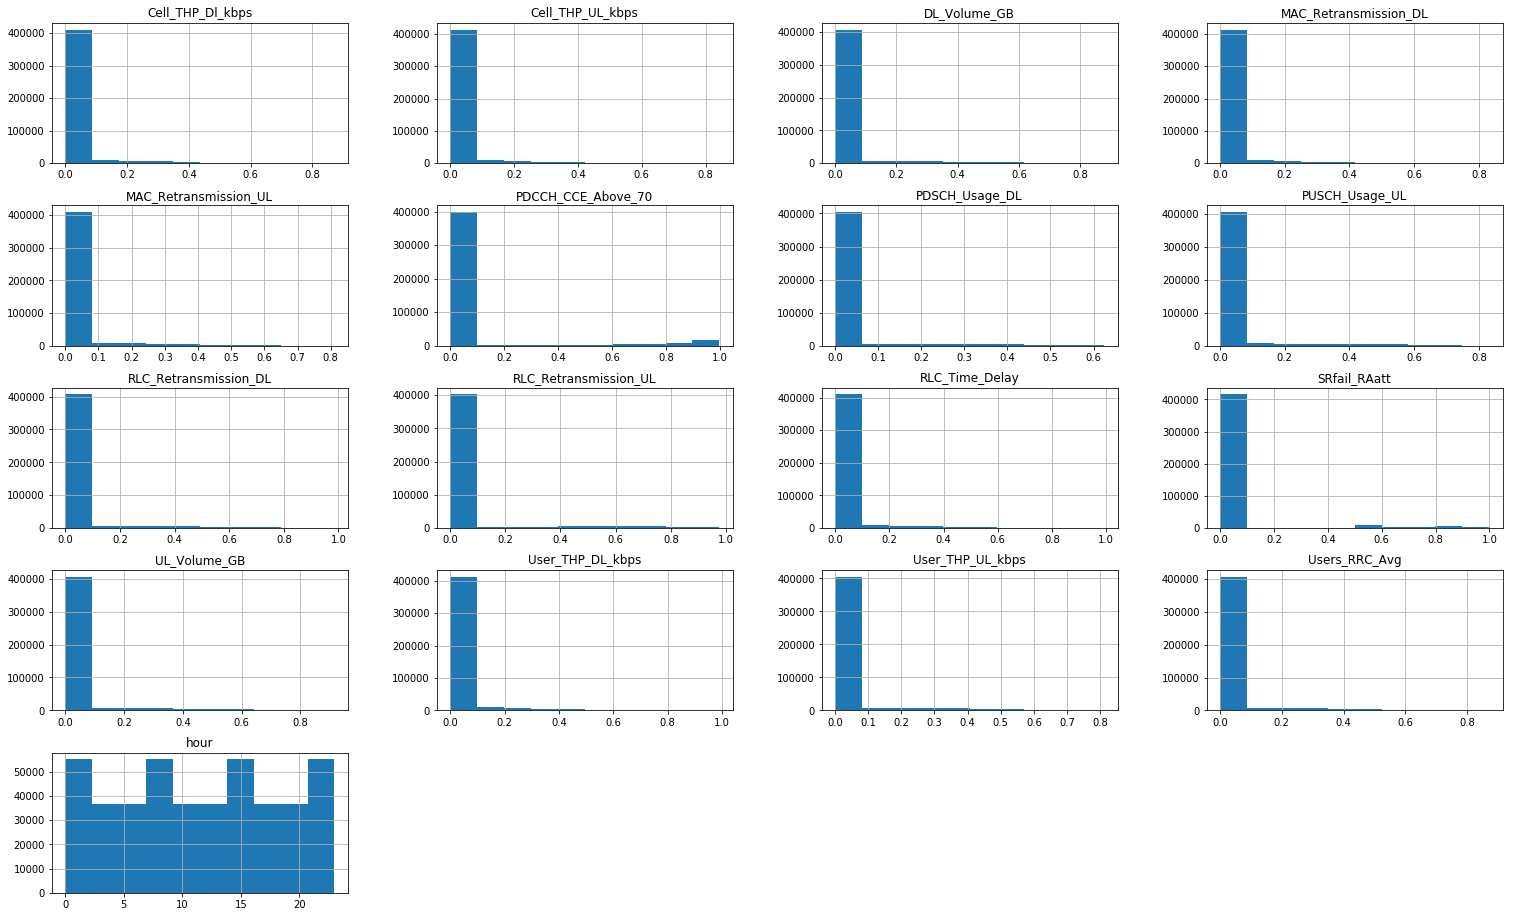

In [141]:
df_normal.hist(figsize=(26, 16))
plt.show()

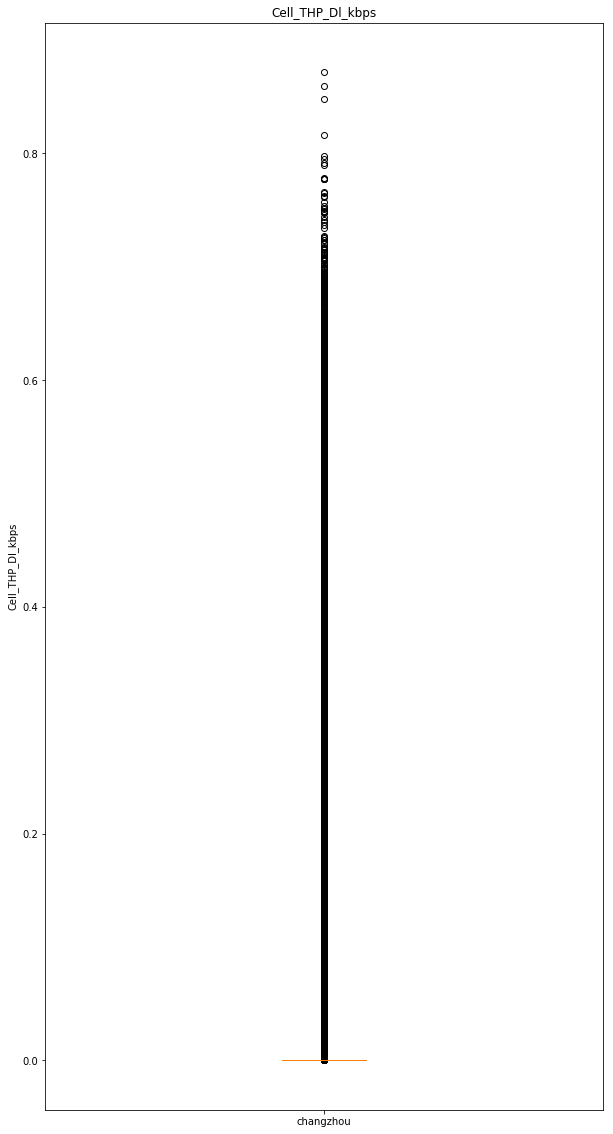

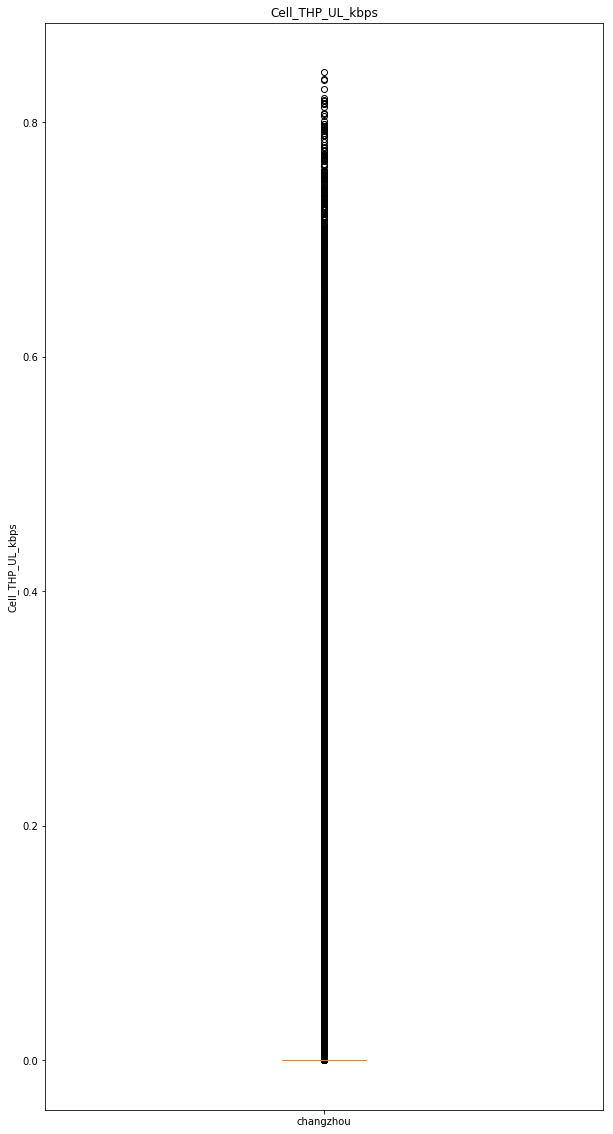

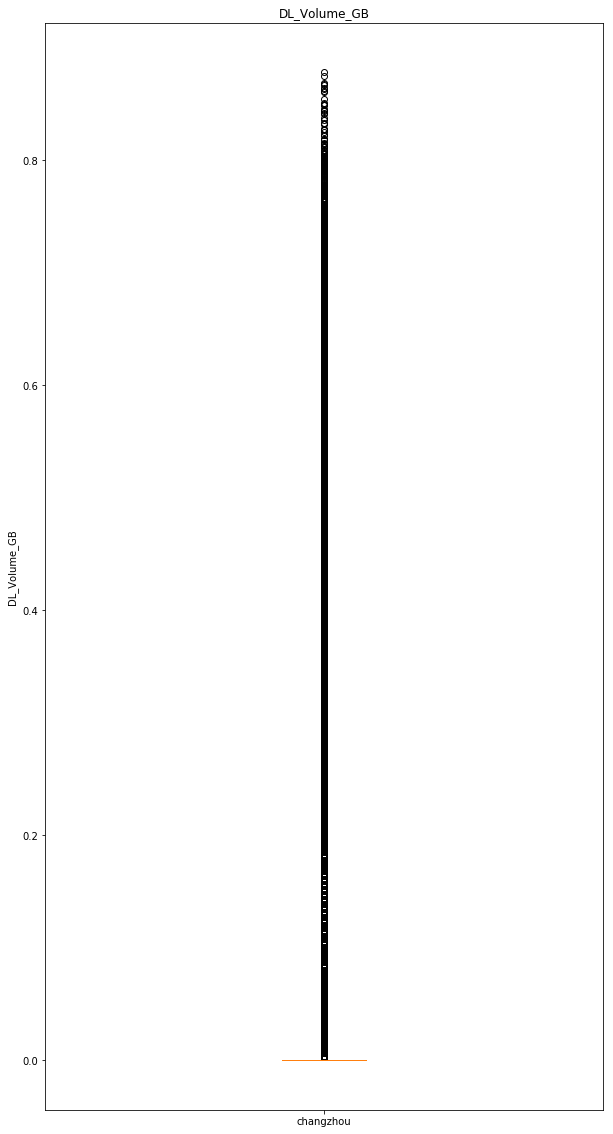

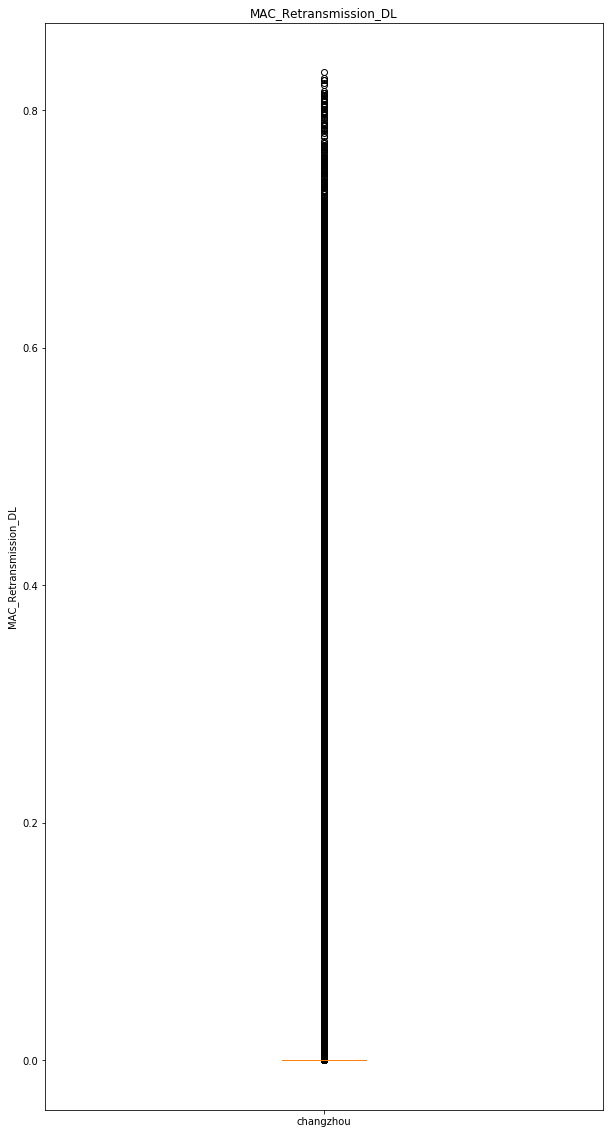

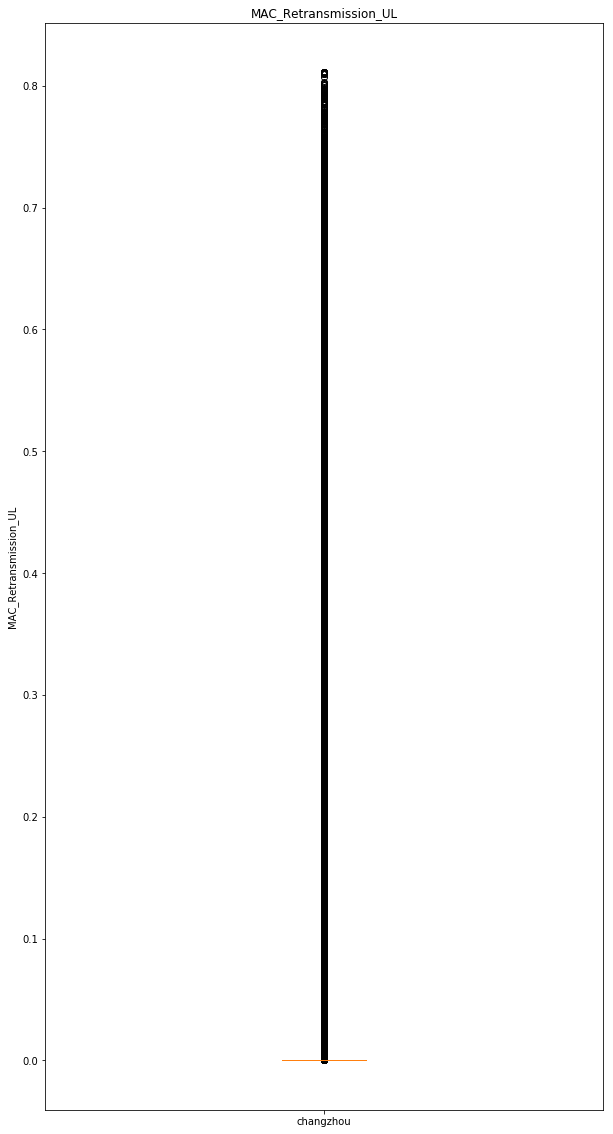

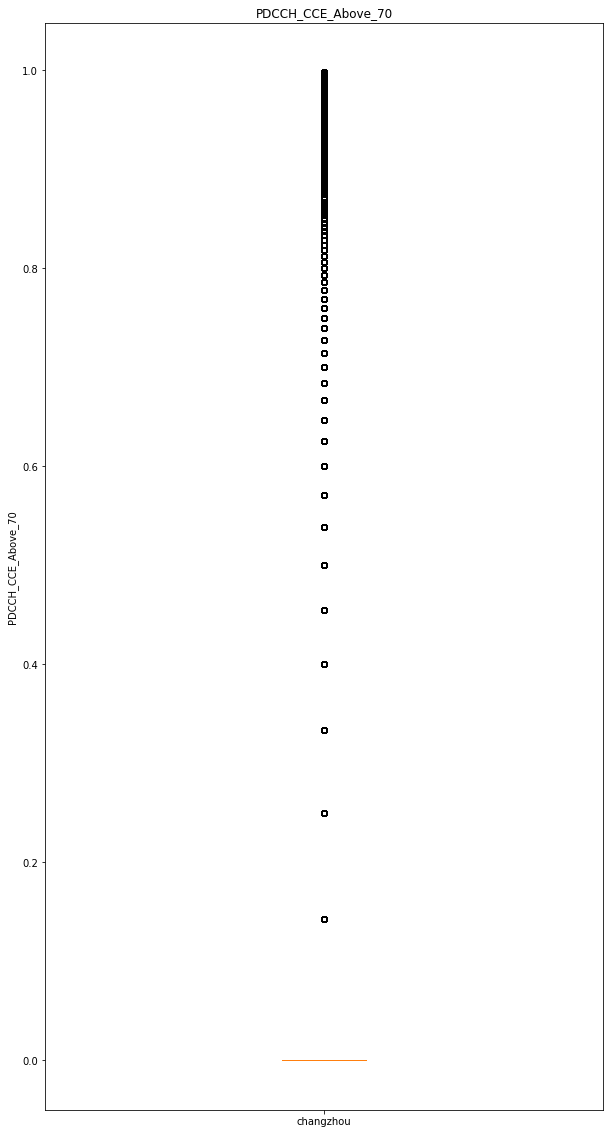

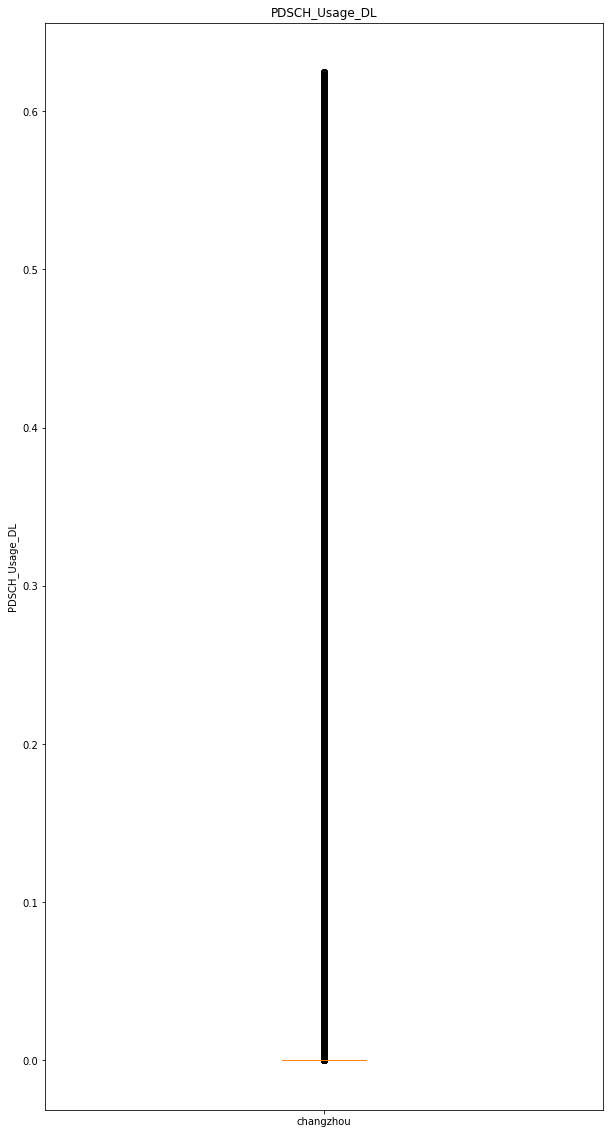

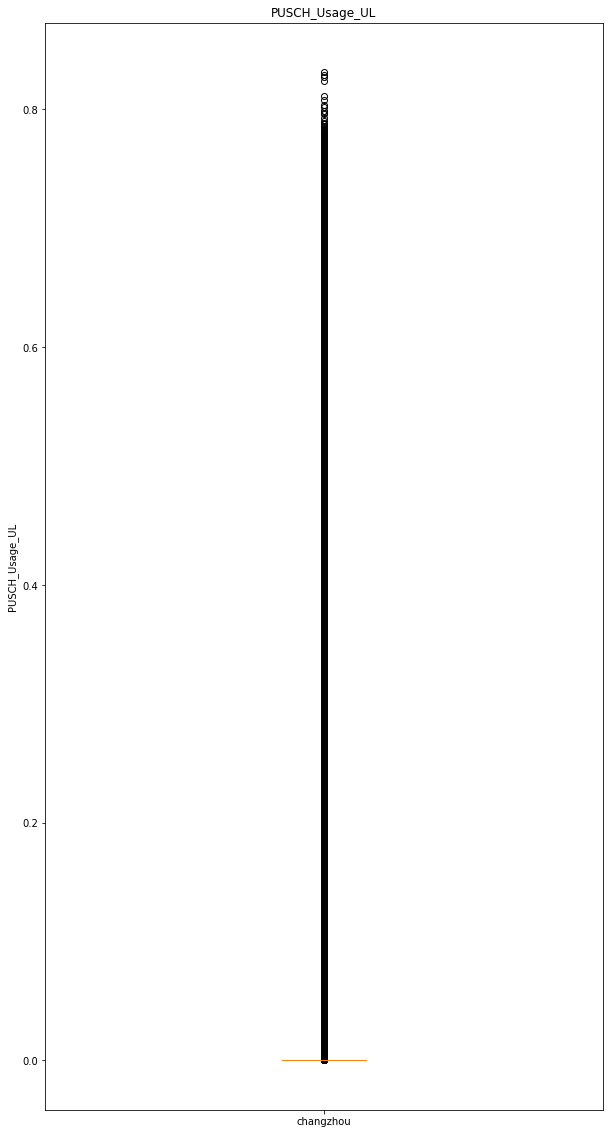

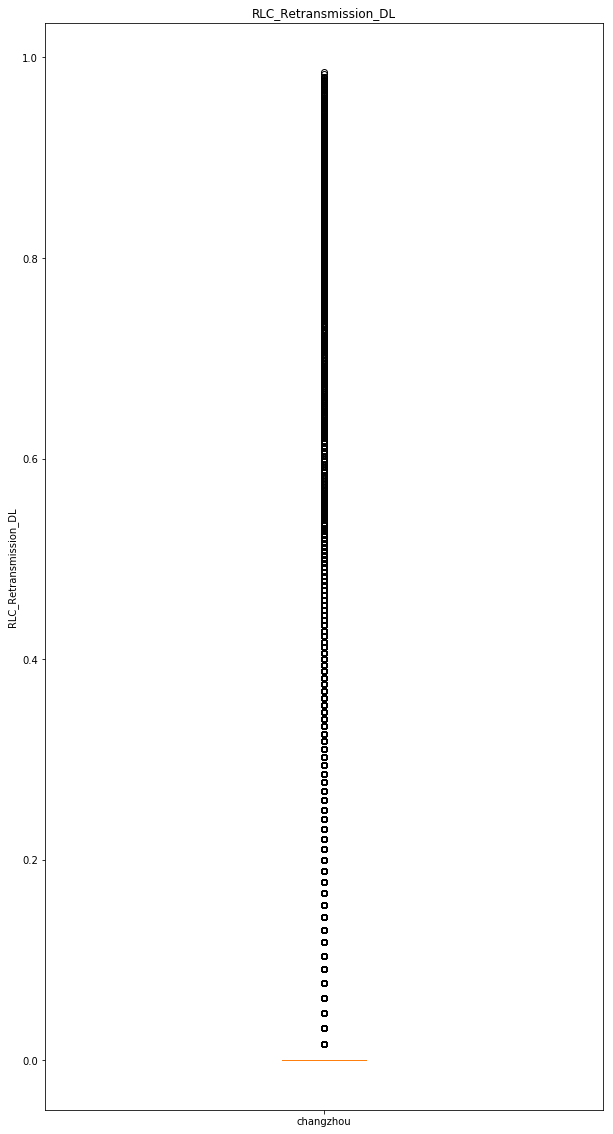

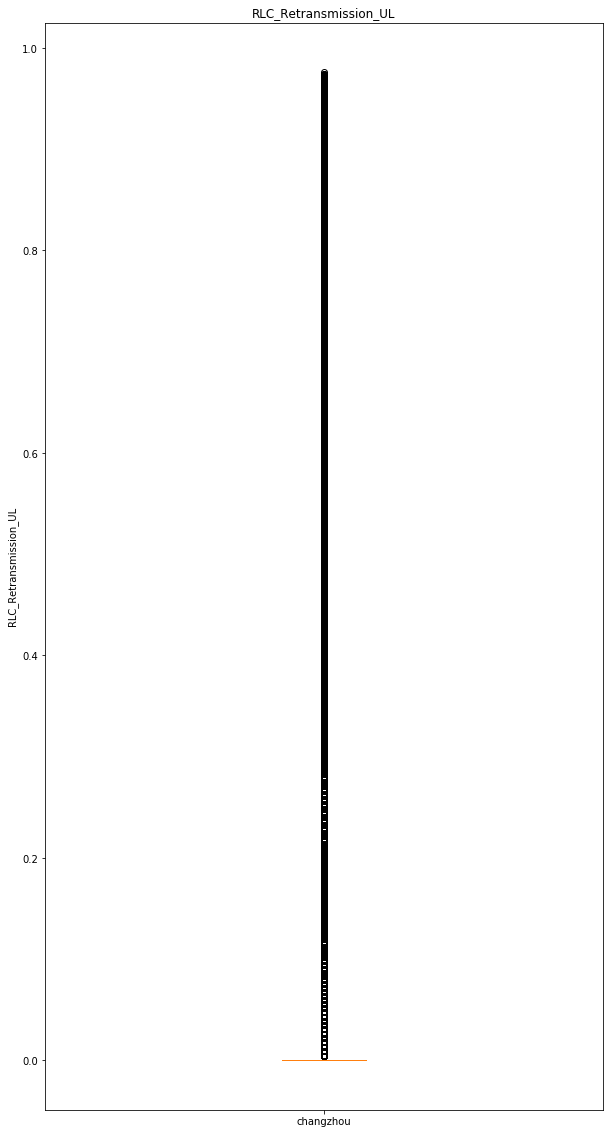

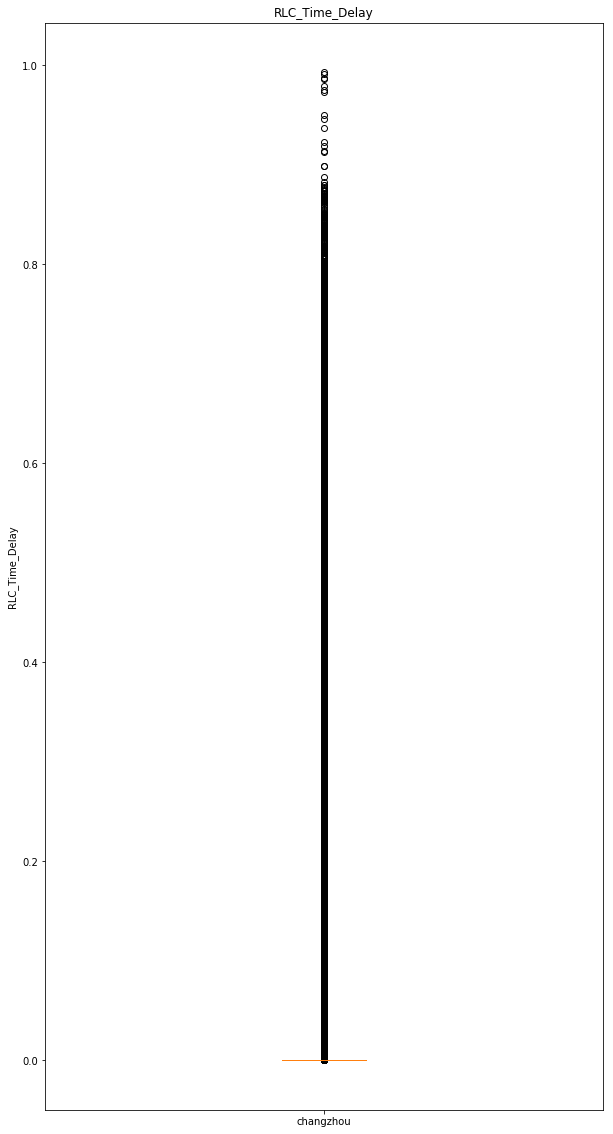

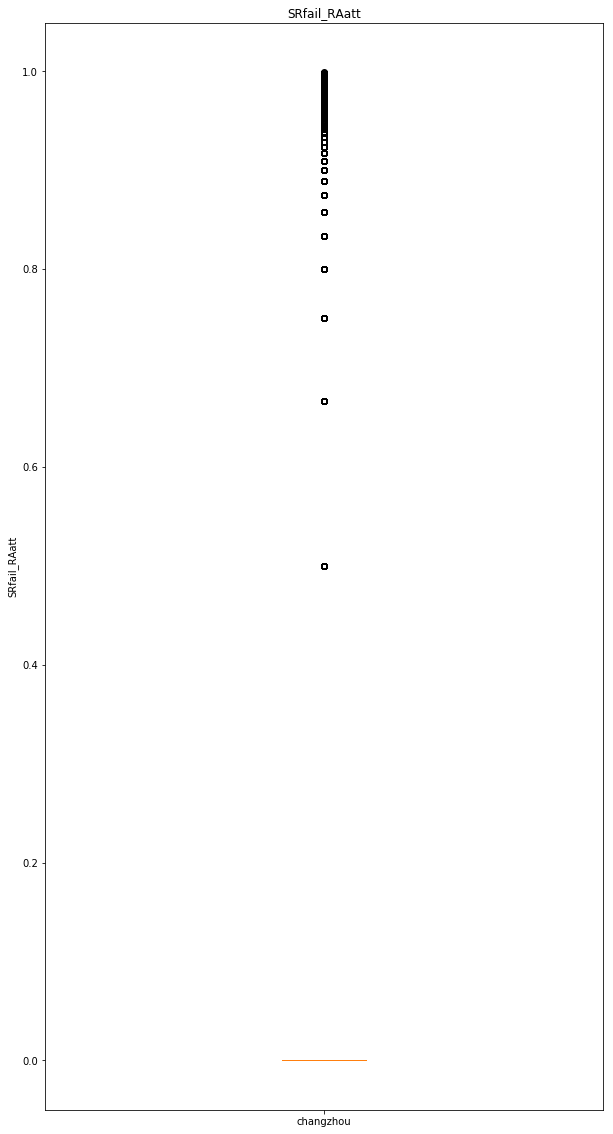

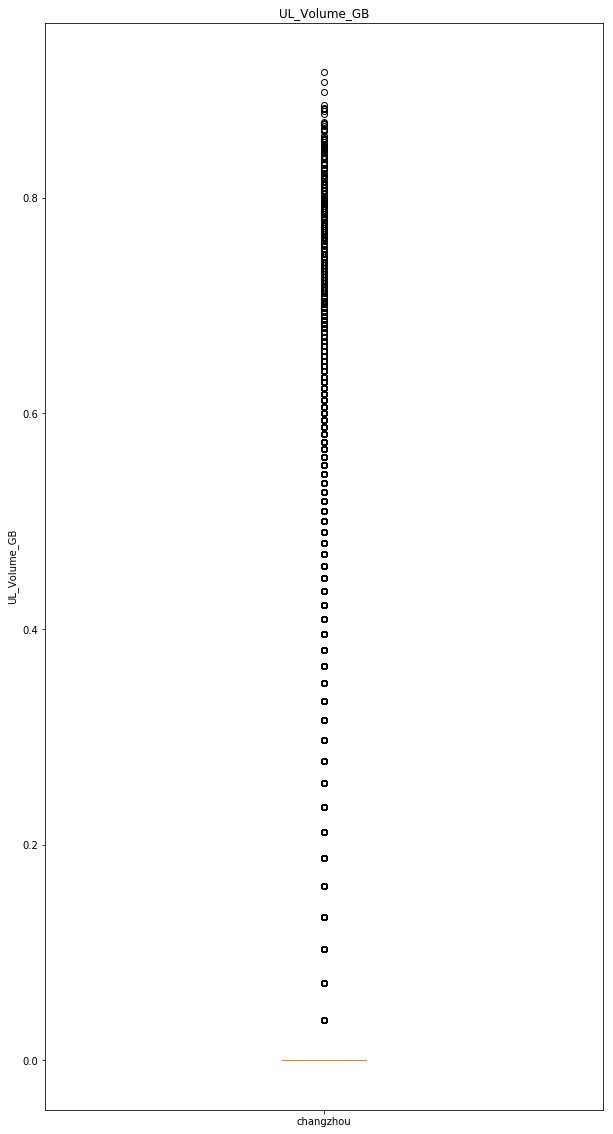

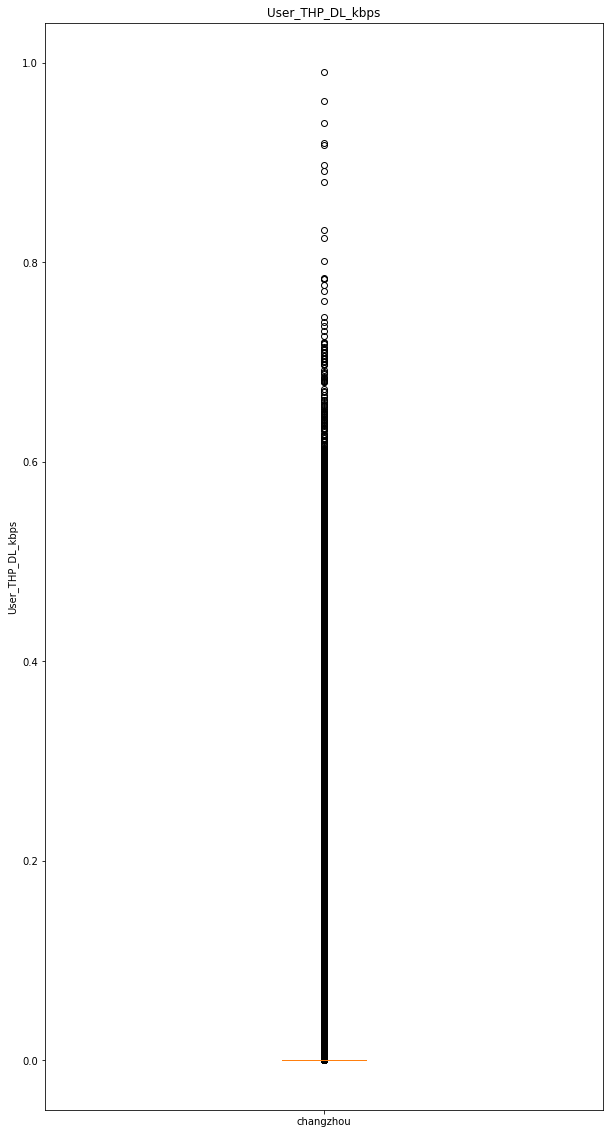

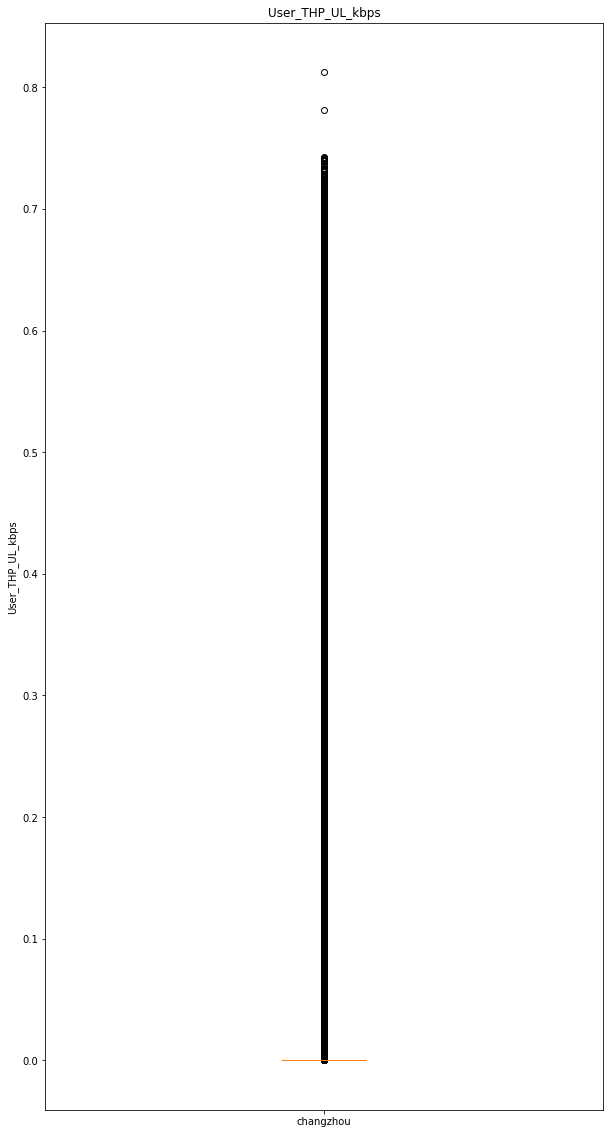

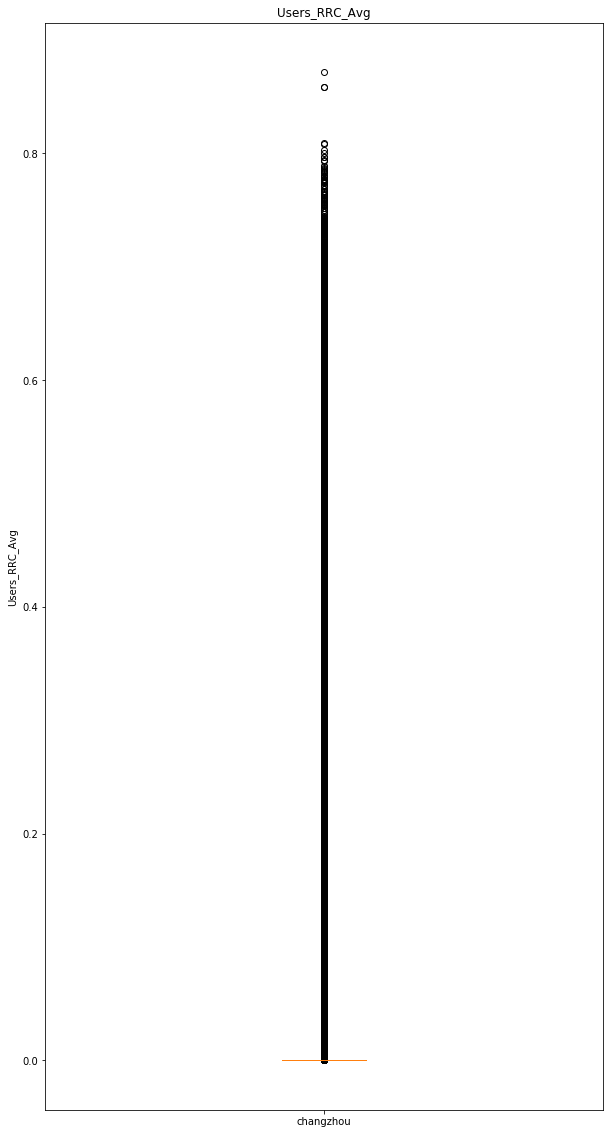

In [142]:
for kpi_name in df_normal.columns.difference(['day','hour', 'cell']):
    # Plot Boxplots
    # Define plot size
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))

    # Plot B1 boxplots
    ax1.boxplot(df_normal[kpi_name], labels=['changzhou'])

    # Define plot characterisitcs
    ax1.set_title(kpi_name)
    ax1.set_ylabel(kpi_name)

    plt.show()
    fig.savefig('kpi_plot/zscore_'+kpi_name+".pdf", bbox_inches='tight')

In [143]:
df_normal.describe()

,hour,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,RLC_Retransmission_DL,RLC_Retransmission_UL,SRfail_RAatt
count,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000
mean,11.500000,0.024996,0.025608,0.072032,0.027186,0.029722,0.028906,0.024826,0.019060,0.028767,0.019731,0.017479,0.018523,0.021365,0.031287,0.047608,0.042277
std,6.922194,0.092284,0.092532,0.231589,0.099621,0.107912,0.104708,0.095000,0.072324,0.102632,0.075269,0.069049,0.074195,0.083314,0.116725,0.165745,0.171368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,0.871735,0.624825,0.998123,0.878628,0.831511,0.916399,0.993128,0.990530,0.812492,0.871685,0.842934,0.831982,0.811209,0.985476,0.976280,0.998981


## 04 Wide Table

In [144]:
df_normal_wide = pd.DataFrame(df_normal.groupby(['cell', 'day', 'hour']).sum().unstack(['day','hour']))

In [145]:
feature_data = np.array(df_normal_wide)

In [146]:
df_cellname = df_normal_wide.index.values

In [147]:
df_normal_wide.head()

Users_RRC_Avg                                              ...   \
day         12/18/2018                                              ...    
hour                0    1    2    3    4    5    6    7    8    9  ...    
cell                                                                ...    
LA3LK31B           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LA3LK31D           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LA3LK31E           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LD31A01B           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LD31A03A           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    

         SRfail_RAatt                                               
day        12/18/2018                                               
hour               14   15   16   17   18   19   20   21   22   23  
cell                                                                
LA3LK31B          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LA3LK31D          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LA3LK31E          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LD31A01B          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LD31A03A          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 384 columns]

In [148]:
df_normal_wide.to_csv('data/changzhou1217/data_wide_pdf90.csv')

In [149]:
feature_data.shape[0]

18435

In [150]:
feature_data_2d = feature_data.reshape(feature_data.shape[0], nb_kpis, 24,1)

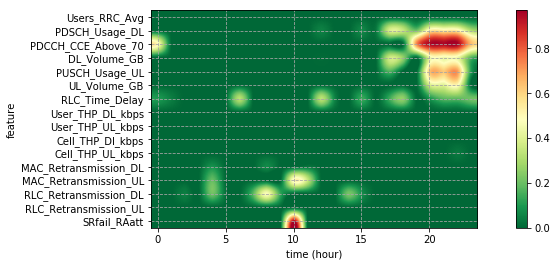

In [151]:
# visualize a sample

# ls_feat = ['DL_PDCCH_Usage', 'DL_PDSCH_Usage', 'DL_Volume', 'UL_PUSCH_Usage', 'UL_Volume']
plt.rcParams["figure.figsize"] = (14, 4)
data =  feature_data_2d[0,:,:,0] 
#plt.xkcd()
im=plt.imshow(data, interpolation='spline16', cmap=plt.cm.get_cmap('RdYlGn_r'))
#plt.clim(0,1)
plt.colorbar(im)
plt.xlabel('time (hour)')
plt.yticks(range(len(kpi_list)), kpi_list)
plt.ylabel('feature')
plt.grid(b=True, which='both', color='0.65', linestyle='--')

plt.show()